Данный датасет представляет собой совокупность структурированных данных, описывающих покупательское поведение клиентов.

Цель анализа - научиться предсказывать наличие подписки у пользователя, полагаясь на имеющиеся данные.

In [38]:
# импорт необходимых модулей
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [39]:
# чтение файла
data = pd.read_csv('shopping_behavior.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(3900, 18)
['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']


In [40]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [42]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


#### Описание кждого поля 

1. **Customer ID (Числовое):** Уникальный идентификатор, присвоенный каждому клиенту. Используется для отслеживания и анализа их поведения при покупках со временем.

2. **Age (Числовое):** Возраст клиента, предоставляющий демографическую информацию для сегментации и создания стратегий таргетированного маркетинга.

3. **Gender (Категориальное: Мужской, Женский):** Пол клиента, ключевая демографическая переменная, влияющая на предпочтения продукции и покупательские паттерны.

4. **Item Purchased (Числовое):** Конкретный продукт или товар, выбранный клиентом во время транзакции.

5. **Category (Категориальное):** Широкая классификация или группа, к которой относится купленный товар (например, одежда, электроника, продукты).

6. **Purchase Amount (USD) (Числовое):** Денежная стоимость транзакции, выраженная в долларах США. Указывает на стоимость приобретенного товара(ов).

7. **Location (Категориальное):** Географическое местоположение, где была совершена покупка. Предоставляет информацию о региональных предпочтениях и трендах рынка.

8. **Size (Категориальное):** Спецификация размера (если применимо) купленного товара, актуальная для одежды, обуви и некоторых товаров.

9. **Color (Категориальное):** Вариант или выбор цвета, связанный с купленным товаром. Влияет на предпочтения клиентов и наличие товара.

10. **Season (Категориальное):** Сезонная актуальность купленного товара (например, весна, лето, осень, зима), влияющая на управление запасами и маркетинговые стратегии.

11. **Review Rating (Числовое):** Числовая или качественная оценка, предоставленная клиентом относительно их удовлетворенности приобретенным товаром.

12. **Subscription Status (Категориальное):** Указывает, подписан ли клиент на услугу подписки. Предоставляет информацию о степени лояльности и потенциале для повторного дохода.

13. **Shipping Type (Категориальное):** Указывает метод доставки купленного товара (например, стандартная доставка, экспресс-доставка), влияя на сроки и стоимость доставки.

14. **Discount Applied (Категориальное):** Указывает, были ли применены какие-либо скидки к покупке, что раскрывает чувствительность к ценам и эффективность акций.

15. **Promo Code Used (Категориальное):** Указывает, использовался ли промо-код или купон во время транзакции, что помогает оценить успех маркетинговой кампании.

16. **Previous Purchases (Числовое):** Предоставляет информацию о количестве или частоте предыдущих покупок, содействуя сегментации клиентов и стратегиям удержания.

17. **Payment Method (Категориальное):** Указывает способ оплаты, используемый клиентом (например, кредитная карта, наличные), предоставляя информацию о предпочтительных вариантах оплаты.

18. **Frequency of Purchases (Числовое):** Указывает, как часто клиент совершает покупки, критический метрик для оценки лояльности клиента и его жизненной ценности.

Наша цель — прогноз переменной  Subscription Status, то есть того, есть ли у клиента подписка? (No — нет, Yes — да).
Переименуем ее для удобства в Y. И заменим значения на бинарные

In [43]:
data = data.rename(columns = {'Subscription Status':'y'})
data['y'] = data['y'].map({'Yes': 1, 'No': 0})

### Исследование данных

In [44]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("% пользователей без подписки", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("% с подпиской               ", pct_of_sub*100)

% пользователей без подписки 73.0
% с подпиской                27.0


Соотношение клиентов c подпиской вклада и без подписки составляет 73 к 27

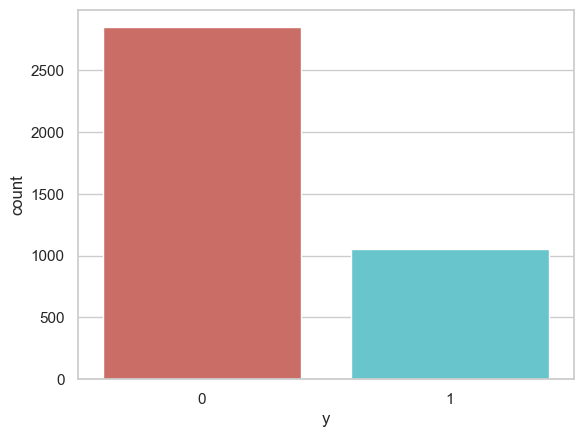

In [45]:
#выводим количество тех у кого есть подписка и у кого нет
sns.countplot(x='y',data=data, palette='hls')
plt.show()

Проверим средние значения числовых данных в зависимости от подписки

In [46]:
data[['Age','Purchase Amount (USD)','Review Rating',  'Previous Purchases', 'y' ]].groupby('y').mean()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
y,,,,
0,44.008430,59.865121,3.752722,25.080436
1,44.230769,59.491928,3.742450,26.084520


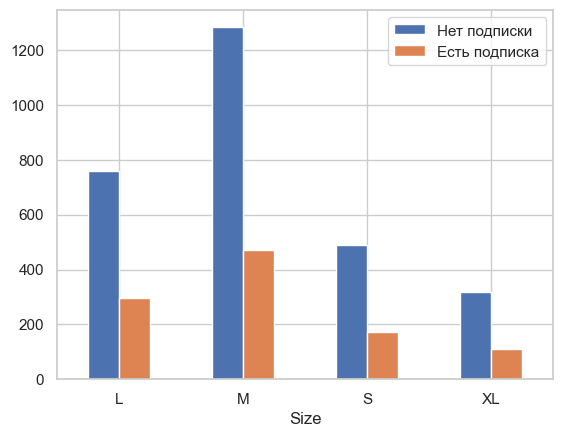

In [47]:
pd.crosstab(data.Size,data.y).plot(kind="bar")
#plt.xlabel('Подписка (0 = нет подписки, 1 = Есть подписка)')
plt.xticks(rotation=0)
plt.legend(["Нет подписки","Есть подписка"])
plt.show()

Подписка никак не зависит от numeric-переменных

In [48]:
data[['Age','Purchase Amount (USD)','Review Rating',  'Previous Purchases', 'y','Gender' ]].groupby('Gender').mean()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,y
Gender,,,,,
Female,44.007212,60.249199,3.741426,24.596154,0.000000
Male,44.097285,59.536199,3.753959,25.707014,0.397059


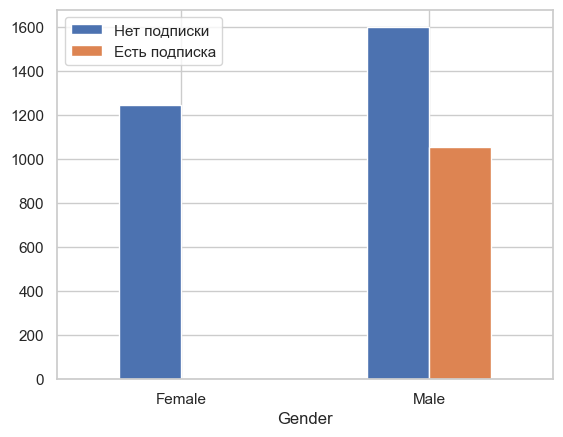

In [49]:
pd.crosstab(data.Gender,data.y).plot(kind="bar")
#plt.xlabel('Подписка (0 = нет подписки, 1 = Есть подписка)')
plt.xticks(rotation=0)
plt.legend(["Нет подписки", "Есть подписка"])
plt.show()

In [50]:
data[['Age','Purchase Amount (USD)','Review Rating',  'Previous Purchases', 'y','Season' ]].groupby('Season').mean()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,y
Season,,,,,
Fall,44.391795,61.556923,3.729949,24.970256,0.270769
Spring,44.582583,58.737738,3.790591,25.116116,0.270270
Summer,43.973822,58.405236,3.725654,25.408377,0.277487
Winter,43.307930,60.357364,3.752111,25.920700,0.261586


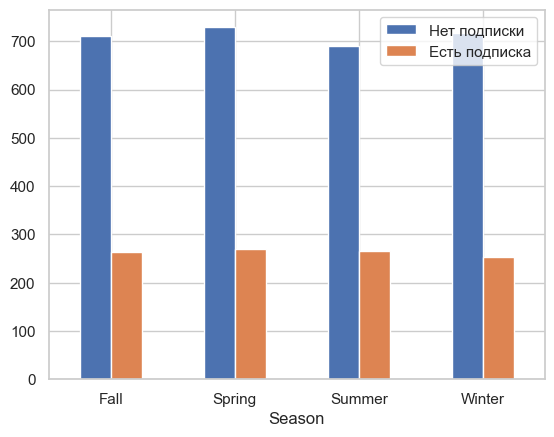

In [51]:
pd.crosstab(data.Season,data.y).plot(kind="bar")
#plt.xlabel('Подписка (0 = нет подписки, 1 = Есть подписка)')
plt.xticks(rotation=0)
plt.legend(["Нет подписки", "Есть подписка"])
plt.show()

In [52]:
data[['Age','Purchase Amount (USD)','Review Rating',  'Previous Purchases', 'y','Shipping Type' ]].groupby('Shipping Type').mean()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,y
Shipping Type,,,,,
2-Day Shipping,43.834131,60.733652,3.761085,26.105263,0.244019
Express,44.958204,60.475232,3.776935,25.496904,0.294118
Free Shipping,43.992593,60.410370,3.717926,24.743704,0.262222
Next Day Air,43.462963,58.631173,3.720833,24.771605,0.259259
Standard,44.764526,58.460245,3.817737,26.232416,0.267584
Store Pickup,43.392308,59.893846,3.706462,24.803077,0.292308


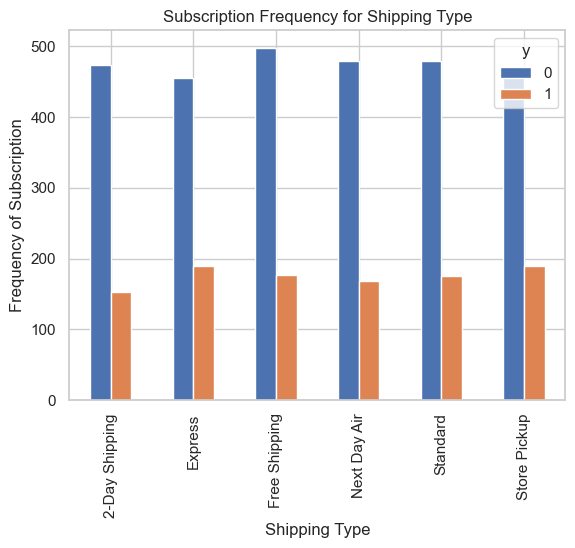

In [53]:
pd.crosstab(data['Shipping Type'],data.y).plot(kind='bar')
plt.title('Subscription Frequency for Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Frequency of Subscription')
plt.savefig('sub_fre_shipping_bar')

In [54]:
data[['Age','Purchase Amount (USD)','Review Rating',  'Previous Purchases', 'y','Promo Code Used' ]].groupby('Promo Code Used').mean()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,y
Promo Code Used,,,,,
No,44.010796,60.130454,3.757715,25.056230,0.000000
Yes,44.144902,59.279070,3.739654,25.742993,0.627907


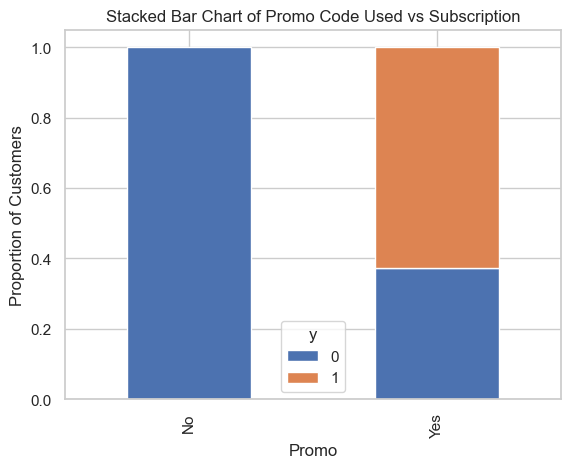

In [55]:
table=pd.crosstab(data['Promo Code Used'],data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Promo Code Used vs Subscription')
plt.xlabel('Promo')
plt.ylabel('Proportion of Customers')
plt.savefig('promo_vs_sub_stack')

Промокод может быть использован только если есть подписка

In [56]:
data[['Age','Purchase Amount (USD)','Review Rating',  'Previous Purchases', 'y','Frequency of Purchases' ]].groupby('Frequency of Purchases').mean()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,y
Frequency of Purchases,,,,,
Annually,44.666084,60.173077,3.755944,24.561189,0.279720
Bi-Weekly,43.201097,60.694698,3.706947,24.787934,0.255941
Every 3 Months,43.407534,60.082192,3.767295,24.960616,0.263699
Fortnightly,43.586716,59.053506,3.755166,25.271218,0.282288
Monthly,44.283906,59.330922,3.776311,25.278481,0.269439
Quarterly,44.685613,59.984014,3.727531,26.854352,0.248668
Weekly,44.649351,58.972171,3.759555,25.771800,0.291280


In [57]:
data[['Age','Purchase Amount (USD)','Review Rating',  'Previous Purchases', 'y','Payment Method' ]].groupby('Payment Method').mean()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,y
Payment Method,,,,,
Bank Transfer,43.864379,59.712418,3.701634,24.501634,0.256536
Cash,44.080597,59.704478,3.750448,25.253731,0.258209
Credit Card,44.633383,60.074516,3.782861,25.588674,0.266766
Debit Card,44.072327,60.915094,3.759748,25.561321,0.298742
PayPal,44.028065,59.245199,3.749631,25.509601,0.265879
Venmo,43.694006,58.949527,3.751735,25.645110,0.274448


In [58]:
# средний чек не сильно зависит от локации. Сортируем локации по возрастанию суммы покупки
data[['Purchase Amount (USD)','Location' ]].groupby('Location').mean().reset_index().sort_values(by='Purchase Amount (USD)')

,Location,Purchase Amount (USD)
6,Connecticut,54.179487
15,Kansas,54.555556
7,Delaware,55.325581
16,Kentucky,55.721519
19,Maryland,55.755814
8,Florida,55.852941
48,Wisconsin,55.946667
5,Colorado,56.293333
22,Minnesota,56.556818
29,New Jersey,56.746269


In [59]:
data[['Age','Purchase Amount (USD)','Review Rating',  'Previous Purchases', 'y','Location' ]].groupby('Location').mean().reset_index().sort_values(by='y')

,Location,Age,Purchase Amount (USD),Review Rating,Previous Purchases,y
15,Kansas,43.079365,54.555556,3.803175,23.380952,0.126984
48,Wisconsin,45.973333,55.946667,3.892000,22.960000,0.173333
41,Tennessee,44.051948,61.974026,3.781818,25.961039,0.181818
42,Texas,42.740260,61.194805,3.905195,21.480519,0.194805
11,Idaho,43.301075,60.075269,3.781720,24.204301,0.204301
6,Connecticut,47.320513,54.179487,3.694872,24.000000,0.205128
21,Michigan,42.095890,62.095890,3.823288,26.945205,0.219178
19,Maryland,46.895349,55.755814,3.805814,26.534884,0.232558
29,New Jersey,45.029851,56.746269,3.767164,23.761194,0.238806
12,Illinois,43.282609,61.054348,3.644565,26.597826,0.239130


In [60]:
data111=data[['Age','Purchase Amount (USD)','Review Rating',  'Previous Purchases', 'y','Location' ]].groupby('Location').mean().reset_index().sort_values(by='y')
min1=data111.head()
min1

,Location,Age,Purchase Amount (USD),Review Rating,Previous Purchases,y
15,Kansas,43.079365,54.555556,3.803175,23.380952,0.126984
48,Wisconsin,45.973333,55.946667,3.892000,22.960000,0.173333
41,Tennessee,44.051948,61.974026,3.781818,25.961039,0.181818
42,Texas,42.740260,61.194805,3.905195,21.480519,0.194805
11,Idaho,43.301075,60.075269,3.781720,24.204301,0.204301


In [61]:
max1=data111.tail()
max1

,Location,Age,Purchase Amount (USD),Review Rating,Previous Purchases,y
35,Oklahoma,43.880000,58.346667,3.605333,22.973333,0.333333
24,Missouri,45.740741,57.913580,3.746914,28.148148,0.333333
27,Nevada,43.609195,63.379310,3.712644,26.034483,0.344828
47,West Virginia,42.543210,63.876543,3.580247,23.555556,0.345679
39,South Carolina,47.500000,58.407895,3.761842,26.000000,0.355263


У покупателей из Канзаса, Висконсина, Теннесси, Техаса реже всего есть подписка сравнивая с другими локациями. Больше всего доля покупателей с подписками в Южной Калифорнии

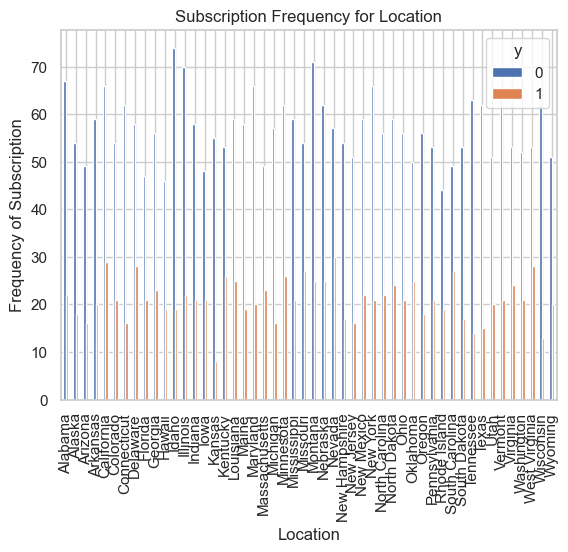

In [62]:
%matplotlib inline
pd.crosstab(data.Location,data.y).plot(kind='bar')
plt.title('Subscription Frequency for Location')
plt.xlabel('Location')
plt.ylabel('Frequency of Subscription')
plt.savefig('Subscription_fre_Location')

Из всех признаков визуальные различия между группами с наличием подписки выделяются только в Location и Promo Code Used

Частота подписки во многом зависит от локации клиента, а значит, эта категориальная переменная может служить хорошим фактором прогнозирования.

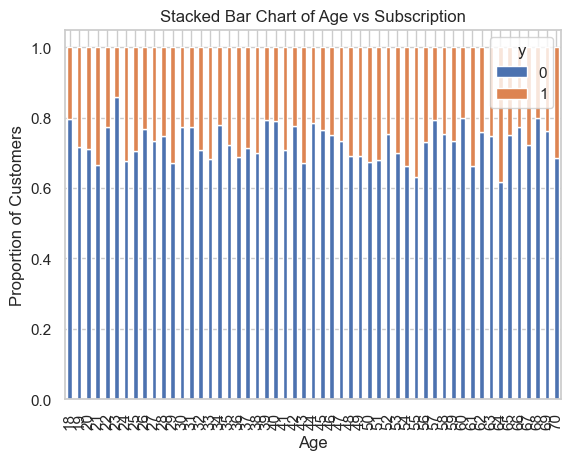

In [63]:
table=pd.crosstab(data.Age,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Subscription')
plt.xlabel('Age')
plt.ylabel('Proportion of Customers')
plt.savefig('Age_vs_sub_stack')

Попробуем объединить возраста в когорты: 18-24, 25-34, 35-44, 45-54, 55-64, 65-70

In [64]:
data45=data

In [65]:
def get_age_cat(x):
    if x<=24:
        return "18-24"
    elif x<=34:
        return "25-34"
    elif x<=44:
        return "35-44"
    elif x<=54:
        return "45-54"
    elif x<=64:
        return "55-64"
    elif x>64:
        return "65+"

In [66]:
data45['Age_cat']=data45['Age'].apply(get_age_cat)
data45.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,y,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_cat
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,Yes,Yes,14,Venmo,Fortnightly,55-64
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,Yes,Yes,2,Cash,Fortnightly,18-24
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,Yes,Yes,23,Credit Card,Weekly,45-54
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-24
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,Yes,Yes,31,PayPal,Annually,45-54


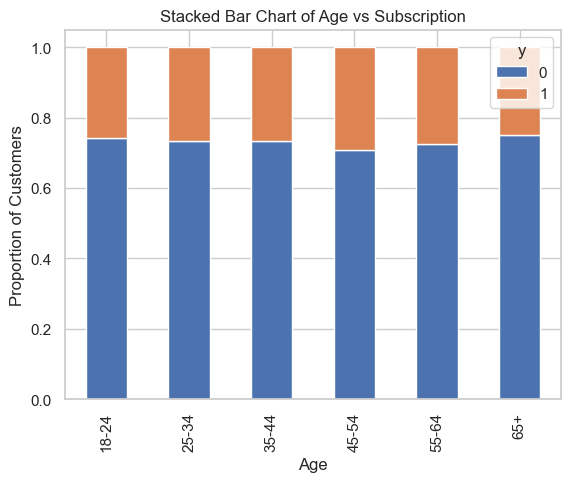

In [67]:
table=pd.crosstab(data45.Age_cat,data45.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Subscription')
plt.xlabel('Age')
plt.ylabel('Proportion of Customers')
plt.savefig('Age_vs_sub_stack')

#### Переменные-заглушки

Эти переменные содержат только значения 0 и 1.

Ниже функция cat_vars названия столбцов с их значениями в массив

In [68]:
cat_vars=['Gender', 'Item Purchased', 'Category',
        'Location', 'Size', 'Color', 'Season',
       'Shipping Type', 'Discount Applied',
       'Promo Code Used',  'Payment Method',
       'Frequency of Purchases']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=[ 'Gender', 'Item Purchased', 'Category',
       'Location', 'Size', 'Color', 'Season',
        'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method',
       'Frequency of Purchases']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

И последние поля:

In [69]:
data_final=data[to_keep]
data_final.columns.values

array(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'y', 'Previous Purchases', 'Age_cat', 'Gender_Female',
       'Gender_Male', 'Item Purchased_Backpack', 'Item Purchased_Belt',
       'Item Purchased_Blouse', 'Item Purchased_Boots',
       'Item Purchased_Coat', 'Item Purchased_Dress',
       'Item Purchased_Gloves', 'Item Purchased_Handbag',
       'Item Purchased_Hat', 'Item Purchased_Hoodie',
       'Item Purchased_Jacket', 'Item Purchased_Jeans',
       'Item Purchased_Jewelry', 'Item Purchased_Pants',
       'Item Purchased_Sandals', 'Item Purchased_Scarf',
       'Item Purchased_Shirt', 'Item Purchased_Shoes',
       'Item Purchased_Shorts', 'Item Purchased_Skirt',
       'Item Purchased_Sneakers', 'Item Purchased_Socks',
       'Item Purchased_Sunglasses', 'Item Purchased_Sweater',
       'Item Purchased_T-shirt', 'Category_Accessories',
       'Category_Clothing', 'Category_Footwear', 'Category_Outerwear',
       'Location_Alabama', 'Location_Alaska'

In [70]:
data_final = data_final.drop(columns = ['Age','Age_cat'])

Обогатим выборку с помощью овер-семплинга https://arxiv.org/pdf/1106.1813.pdf

In [71]:
#!pip3 install imbalanced-learn

In [72]:
from imblearn import  over_sampling
from imblearn.over_sampling import SMOTE

In [73]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

### Рекурсивное устранение признаков

Рекурсивные устранение признаков построено на идее повторяющегося конструирования модели и выбора лучших и худших в смысле производительности признаков, а затем  отбрасывания признака и повторения процесса до исчерпания всех данных. Цель — выбирать признаки, рекурсивно рассматривая всё меньшие и меньшие их множества.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, step = 5)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

Метод выбрал нужные значение, сопоставим их со списком data_final_vars

In [ ]:
data_final_vars.remove('y')

In [ ]:
dict = {'data_final_vars': data_final_vars, 'ranking_': rfe.ranking_} 
    
df = pd.DataFrame(dict)
df = df[df['ranking_'] == 1]
print(' Метод помог выбрать следующие признаки: ', df['data_final_vars'].to_list())

In [ ]:
cols=['Gender_Male', 'Item Purchased_Backpack', 'Item Purchased_Coat', 'Item Purchased_Gloves', 'Item Purchased_Scarf', 'Item Purchased_Shoes', 'Item Purchased_Skirt', 'Item Purchased_Socks', 'Category_Accessories', 'Category_Clothing', 'Category_Footwear', 'Category_Outerwear', 'Location_Alabama', 'Location_Arizona', 'Location_California', 'Location_Delaware', 'Location_Florida', 'Location_Georgia', 'Location_Indiana', 'Location_Kentucky', 'Location_Louisiana', 'Location_Minnesota', 'Location_Montana', 'Location_Nevada', 'Location_North Dakota', 'Location_Oklahoma', 'Location_Rhode Island', 'Location_South Carolina', 'Location_Texas', 'Location_Virginia', 'Location_West Virginia', 'Location_Wisconsin', 'Size_L', 'Size_M', 'Size_S', 'Size_XL', 'Color_Blue', 'Color_Charcoal', 'Color_Gray', 'Color_Green', 'Color_Olive', 'Color_Purple', 'Color_Teal', 'Color_Turquoise', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Shipping Type_2-Day Shipping', 'Shipping Type_Express', 'Shipping Type_Free Shipping', 'Shipping Type_Next Day Air', 'Shipping Type_Standard', 'Shipping Type_Store Pickup', 'Discount Applied_No', 'Discount Applied_Yes', 'Promo Code Used_No', 'Promo Code Used_Yes', 'Payment Method_Bank Transfer', 'Payment Method_Cash', 'Payment Method_Credit Card', 'Payment Method_Debit Card', 'Payment Method_PayPal', 'Payment Method_Venmo', 'Frequency of Purchases_Annually', 'Frequency of Purchases_Bi-Weekly', 'Frequency of Purchases_Every 3 Months', 'Frequency of Purchases_Fortnightly', 'Frequency of Purchases_Monthly', 'Frequency of Purchases_Quarterly', 'Frequency of Purchases_Weekly']
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
cols

In [ ]:
len(set(cols))

#### Реализация модели

In [ ]:
import statsmodels.api as sm
logit=sm.Logit(y,X)
result=logit.fit()
print(result.summary2())

p-значение больше 0,1  мы удалим, останется :'Location_Kentucky',
'Color_Olive',
'Location_Delaware',
'Shipping',
'Shipping',
'Color_Purple',
'Location_Louisiana',
'Location_Minnesota',
'Location_Wisconsin',
'Color_Turquoise',
'Location_Indiana',
'Location_Arizona',
'Location_Montana',
'Location_Oklahoma',
'Location_California',
'Color_Charcoal'

cols=['Location_Kentucky', 'Color_Olive', 'Location_Delaware', 'Color_Purple', 'Location_Louisiana', 'Location_Minnesota', 'Location_Wisconsin', 'Color_Turquoise', 'Location_Indiana', 'Location_Arizona', 'Location_Montana', 'Location_Oklahoma', 'Location_California', 'Color_Charcoal'] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

#### Обучение модели логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Прогноз на тестовом наборе и расчёт точности:

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Точность классификатора логистической регрессии на тестовом наборе: 0,90

Матрица путаницы

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

У нас 516+570 верных и 27+94 неверных прогнозов.

Расчёт точности, полноты, F-меры и носителя

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

### Интерпретация:

90% предложений подписаться на рассылку понравились клиентам.

### ROC-кривая

https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F
    
ROC-кривая (англ. receiver operating characteristic, рабочая характеристика приёмника) — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (англ. true positive rate, TPR, называемой чувствительностью алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (англ. false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила.

https://www.codecamp.ru/blog/interpret-roc-curve/

По ссылке выше информация по тому, как читать график

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# !pip install kaleido 